In [1]:
from sklearn.model_selection import train_test_split   
#import pickle
import math
from sklearn import preprocessing 

#import statements
from keras.layers.core import Dense, Activation, Dropout #core layers that used to build the network
from keras.layers.recurrent import LSTM,GRU,SimpleRNN
from keras.models import Sequential, load_model
import time
import pandas as pd #define the data structures
import matplotlib as plt #for visualization
from sklearn.preprocessing import StandardScaler #for normalizing our data(scaling)
import numpy as np #for matrix multiplication
import matplotlib.pyplot as plt

#read the annotated file 
from math import sqrt
from numpy import concatenate 
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
import plotly.offline as py
import plotly.graph_objs as go 
import seaborn as sns
py.init_notebook_mode(connected=True)
import os  
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy
numpy.random.seed(16)

Using TensorFlow backend.


In [2]:
# # Training data
df = pd.read_csv(r'./data2.csv')
df.head()

df.shape

df.shape# ## Min Max Normalization

# In[688]:


Y=df.iloc[:,-3:] #只取後面四個
X=df.iloc[:,:-3] #不取後面四個

print (X)
print (Y)
# conversion to numpy array
x, y = X.values, Y.values  

# scaling values for model 壓縮資料0~1
x_scale = MinMaxScaler(feature_range=(0, 1))
y_scale = MinMaxScaler(feature_range=(0, 1)) 


X = x_scale.fit_transform(x)
Y = y_scale.fit_transform(y)   
print(len(X),len(Y))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20) 
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)


# In[689]:


X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


# In[690]:

X_test.shape

          P1        P2        P3        P4        P5        P6        P7  \
0   0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
1   0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
2   0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
3   0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
4   0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
5   0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
6   0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
7   0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
8   0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
9   0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
10  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
11  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   
12  0.000009

(6, 1, 2001)

In [3]:
#Here’s the code for the model build functions
from timeit import default_timer as timer
def lstm(feature): 
    model_name = 'FBG sensor_LSTM_' 
    model = Sequential()#Initialising the LSTM
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units=512,return_sequences=True, input_shape=(None, feature)))   # none replace by 1
    model.add(Dropout(0.2))
    
    #Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(512, return_sequences=False,activation='sigmoid'))
    model.add(Dropout(0.2))
    
    #model.add(LSTM(units=512,return_sequences=False, activation='relu'))   # none replace by 1
   # model.add(Dropout(0.2))
    
    #model.add(LSTM(units=512,return_sequences=False, activation='relu'))   # none replace by 1
   # model.add(Dropout(0.2))
    
    
    #Adding the output layer which is 4
    #model.add(Dense(units=4))
    
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(3, activation='tanh'))
    #model.add(Dense(3, activation='softmax'))
    #model.add(Dense(3, activation='softmax'))
    start = time.time()
    #model.compile(loss='mse', optimizer='adam',metrics=['accuracy']) #Compiling the LSTM 
    model.compile(loss='mse', optimizer='Adamax',metrics=['accuracy']) 

 #   model.compile(loss='mse',optimizer='sgd',metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='Adamax',metrics=['accuracy']) 

   
    return model


start = timer()

In [4]:
import tensorflow as tf
import keras
#from keras.backend.tensorflow_backend import set_session
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth =True

#set_session(tf.Session(config=config)) 
#if gpu fail

In [5]:
# # LSTM Model

# In[692]:

model_lstm=lstm(X_train.shape[2])
model_lstm.summary()
##Fitting the LSTM to the Training set
hist_lstm=model_lstm.fit(X_train, y_train, batch_size=2000, epochs=100, validation_split=0.2, verbose=1)

duration = timer() - start
print('Compilation Time:',duration)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 512)         5148672   
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1539      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
Total params: 7,249,423
Trainable params: 7,249,423
Non-trainable params: 0
______________________________________________

1/1 [==============================] - 0s 69ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 51/100
1/1 [==============================] - 0s 69ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 52/100
1/1 [==============================] - 0s 69ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 53/100
1/1 [==============================] - 0s 70ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 54/100
1/1 [==============================] - 0s 70ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 55/100
1/1 [==============================] - 0s 70ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 56/100
1/1 [==============================] - 0s 68ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 57/100
1/1 [========

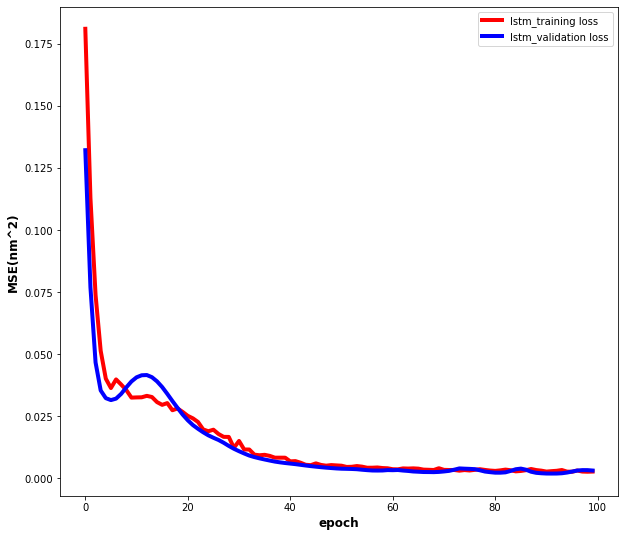

In [6]:
plt.figure(figsize=(10,9))

plt.plot(hist_lstm.history['loss'],'red',linewidth=4)
plt.plot(hist_lstm.history['val_loss'],'blue',linewidth=4)
plt.ylabel('MSE(nm^2)',fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.xlabel('epoch',fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.legend(['lstm_training loss', 'lstm_validation loss'], loc='upper right')
plt.show()


In [7]:
plt.figure(figsize=(10,9))

plt.plot(hist_lstm.history['acc'],'red',linewidth=4)
plt.plot(hist_lstm.history['val_acc'],'black',linewidth=4)
plt.ylabel('MSE(nm^2)',fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.xlabel('epoch',fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.legend(['lstm_accuracy', 'lstm_validation accuracy'], loc='upper right')
plt.show()


KeyError: 'acc'

<Figure size 720x648 with 0 Axes>

In [9]:
#Here’s the code for the model build functions
from timeit import default_timer as timer
def rnn(feature): 
    model_name = 'FBG sensor_SimpleRNN_' 
    model = Sequential()#Initialising the LSTM
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(SimpleRNN(units=512,return_sequences=True, input_shape=(None, feature)))   # none replace by 1
    model.add(Dropout(0.2))
    
    #Adding a second LSTM layer and some Dropout regularisation
    model.add(SimpleRNN(512, return_sequences=False))
    model.add(Dropout(0.2))
    
    #Adding the output layer which is 4
    #model.add(Dense(units=4))
    
 
    model.add(Dense(3, activation='tanh'))
    #model.add(Dense(4, activation='sigmoid'))
    #model.add(Dense(4, activation='softmax'))
    start = time.time()
    #model.compile(loss='mse', optimizer='adam',metrics=['accuracy']) #Compiling the LSTM 
    model.compile(loss='MSE', optimizer='Adamax',metrics=['accuracy']) 
 #   model.compile(loss='mse',optimizer='sgd',metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='Adamax',metrics=['accuracy']) 
    return model
start = timer()

In [11]:
import tensorflow as tf
import keras
from tensorflow.compat.v1.keras.backend import set_session
#from keras.backend.tensorflow_backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth =True

#set_session(tf.Session(config=config)) 
#if gpu fail

In [12]:
# # rnn Model

# In[692]:

model_rnn=rnn(X_train.shape[2])
model_rnn.summary()
##Fitting the LSTM to the Training set
hist_rnn=model_rnn.fit(X_train, y_train, batch_size=2000, epochs=250, validation_split=0.2, verbose=1)
duration = timer() - start
print('Compilation Time:',duration)




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 512)         1287168   
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 1,813,507
Trainable params: 1,813,507
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
1/1 [==============================] - 0s 236ms/step - loss: 0.2477 - accuracy: 0.9412 - val_loss:

Epoch 109/250
1/1 [==============================] - 0s 13ms/step - loss: 0.5167 - accuracy: 1.0000 - val_loss: 0.4988 - val_accuracy: 1.0000
Epoch 110/250
1/1 [==============================] - 0s 13ms/step - loss: 0.5502 - accuracy: 1.0000 - val_loss: 0.4913 - val_accuracy: 1.0000
Epoch 111/250
1/1 [==============================] - 0s 12ms/step - loss: 0.5028 - accuracy: 1.0000 - val_loss: 0.5105 - val_accuracy: 1.0000
Epoch 112/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5224 - accuracy: 1.0000 - val_loss: 0.5293 - val_accuracy: 1.0000
Epoch 113/250
1/1 [==============================] - 0s 14ms/step - loss: 0.4954 - accuracy: 1.0000 - val_loss: 0.5395 - val_accuracy: 1.0000
Epoch 114/250
1/1 [==============================] - 0s 11ms/step - loss: 0.4975 - accuracy: 1.0000 - val_loss: 0.5167 - val_accuracy: 1.0000
Epoch 115/250
1/1 [==============================] - 0s 12ms/step - loss: 0.5390 - accuracy: 1.0000 - val_loss: 0.4884 - val_accuracy: 1.0000
Epoch 

Epoch 224/250
1/1 [==============================] - 0s 11ms/step - loss: 0.4890 - accuracy: 1.0000 - val_loss: 0.4947 - val_accuracy: 1.0000
Epoch 225/250
1/1 [==============================] - 0s 13ms/step - loss: 0.5089 - accuracy: 1.0000 - val_loss: 0.5162 - val_accuracy: 1.0000
Epoch 226/250
1/1 [==============================] - 0s 12ms/step - loss: 0.5153 - accuracy: 1.0000 - val_loss: 0.5846 - val_accuracy: 1.0000
Epoch 227/250
1/1 [==============================] - 0s 12ms/step - loss: 0.5543 - accuracy: 1.0000 - val_loss: 0.5987 - val_accuracy: 1.0000
Epoch 228/250
1/1 [==============================] - 0s 13ms/step - loss: 0.5301 - accuracy: 1.0000 - val_loss: 0.5588 - val_accuracy: 1.0000
Epoch 229/250
1/1 [==============================] - 0s 12ms/step - loss: 0.5539 - accuracy: 1.0000 - val_loss: 0.5053 - val_accuracy: 1.0000
Epoch 230/250
1/1 [==============================] - 0s 15ms/step - loss: 0.5366 - accuracy: 1.0000 - val_loss: 0.4924 - val_accuracy: 1.0000
Epoch 

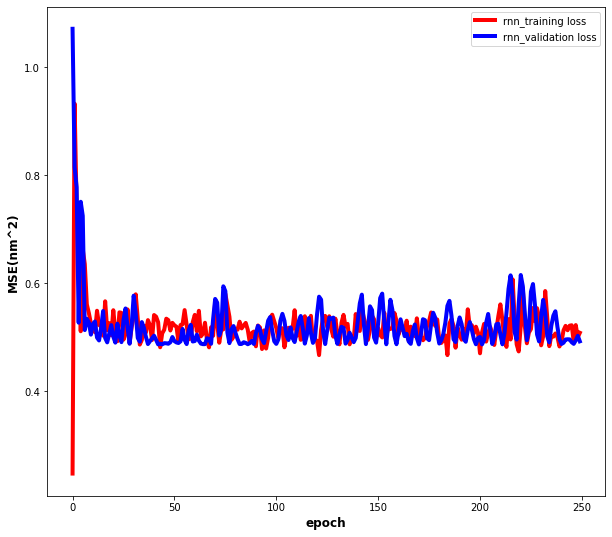

In [13]:
plt.figure(figsize=(10,9))

plt.plot(hist_rnn.history['loss'],'red',linewidth=4)
plt.plot(hist_rnn.history['val_loss'],'blue',linewidth=4)
plt.ylabel('MSE(nm^2)',fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.xlabel('epoch',fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.legend(['rnn_training loss', 'rnn_validation loss'], loc='upper right')
plt.show()

In [14]:
plt.figure(figsize=(10,9))

plt.plot(hist_rnn.history['acc'],'red',linewidth=4)
plt.plot(hist_rnn.history['val_acc'],'black',linewidth=4)
plt.ylabel('MSE(nm^2)',fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.xlabel('epoch',fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.legend(['rnn_accuracy', 'rnn_validation accuracy'], loc='upper right')
plt.show()

KeyError: 'acc'

<Figure size 720x648 with 0 Axes>

In [15]:
from timeit import default_timer as timer
def gru(feature):
    input_shapes=(None, feature)
    
    print(input_shapes)
    model_name = 'FBG sensor_GRU_' 
    model = Sequential()
    model.add(GRU(units=512, return_sequences=True, input_shape=input_shapes))
    model.add(Dropout(0.2))
    model.add(GRU(units=512,activation='sigmoid'))
    model.add(Dropout(0.2))
   
    #model.add(Dense(3, activation='sigmoid'))
    #model.add(Dense(4, activation='tanh'))
    #model.add(Dense(4, activation='sigmoid'))
    #model.add(Dense(4, activation='relu'))
    model.add(Dense(3, activation='tanh'))
    start = time.time()
    
    #model.compile(loss='mse', optimizer='adam',metrics=['accuracy']) 
    model.compile(loss='mse',optimizer='Adamax',metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='sgd',metrics=['accuracy']) 
    #model.compile(loss='mse', optimizer='Adamax',metrics=['accuracy']) 
    return model
start = timer()

In [16]:
model_gru=gru(X_train.shape[2])
model_gru.summary()
##Fitting the LSTM to the Training set
hist_gru=model_gru.fit(X_train, y_train, batch_size=2000, epochs=250, validation_split=0.2, verbose=1)

duration = timer() - start
print('Compilation Time:',duration)

(None, 2001)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         3863040   
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, 512)               1575936   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 5,440,515
Trainable params: 5,440,515
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
1/1 [==============================] - 1s 637ms/step - loss: 0.0981 - accuracy: 0.705

Epoch 52/250
1/1 [==============================] - 0s 15ms/step - loss: 0.0186 - accuracy: 0.8824 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 53/250
1/1 [==============================] - 0s 16ms/step - loss: 0.0285 - accuracy: 0.8235 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 54/250
1/1 [==============================] - 0s 15ms/step - loss: 0.0206 - accuracy: 0.8235 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 55/250
1/1 [==============================] - 0s 14ms/step - loss: 0.0118 - accuracy: 0.7647 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 56/250
1/1 [==============================] - 0s 14ms/step - loss: 0.0160 - accuracy: 0.9412 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 57/250
1/1 [==============================] - 0s 14ms/step - loss: 0.0140 - accuracy: 0.8824 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 58/250
1/1 [==============================] - 0s 14ms/step - loss: 0.0237 - accuracy: 0.7059 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 59/250


Epoch 110/250
1/1 [==============================] - 0s 14ms/step - loss: 0.0117 - accuracy: 0.9412 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 111/250
1/1 [==============================] - 0s 15ms/step - loss: 0.0143 - accuracy: 0.8235 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 112/250
1/1 [==============================] - 0s 15ms/step - loss: 0.0128 - accuracy: 0.8824 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 113/250
1/1 [==============================] - 0s 13ms/step - loss: 0.0131 - accuracy: 0.9412 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 114/250
1/1 [==============================] - 0s 14ms/step - loss: 0.0107 - accuracy: 0.9412 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 115/250
1/1 [==============================] - 0s 14ms/step - loss: 0.0100 - accuracy: 0.8824 - val_loss: 9.2326e-04 - val_accuracy: 1.0000
Epoch 116/250
1/1 [==============================] - 0s 13ms/step - loss: 0.0144 - accuracy: 0.8235 - val_loss: 7.3767e-04 - val_accuracy: 1.000

1/1 [==============================] - 0s 13ms/step - loss: 0.0094 - accuracy: 0.8824 - val_loss: 5.9419e-04 - val_accuracy: 1.0000
Epoch 168/250
1/1 [==============================] - 0s 13ms/step - loss: 0.0056 - accuracy: 0.8824 - val_loss: 9.9411e-04 - val_accuracy: 1.0000
Epoch 169/250
1/1 [==============================] - 0s 14ms/step - loss: 0.0113 - accuracy: 0.8824 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 170/250
1/1 [==============================] - 0s 14ms/step - loss: 0.0081 - accuracy: 0.8235 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 171/250
1/1 [==============================] - 0s 14ms/step - loss: 0.0121 - accuracy: 0.8824 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 172/250
1/1 [==============================] - 0s 14ms/step - loss: 0.0108 - accuracy: 0.8824 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 173/250
1/1 [==============================] - 0s 14ms/step - loss: 0.0084 - accuracy: 0.8824 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 174/25

No handles with labels found to put in legend.


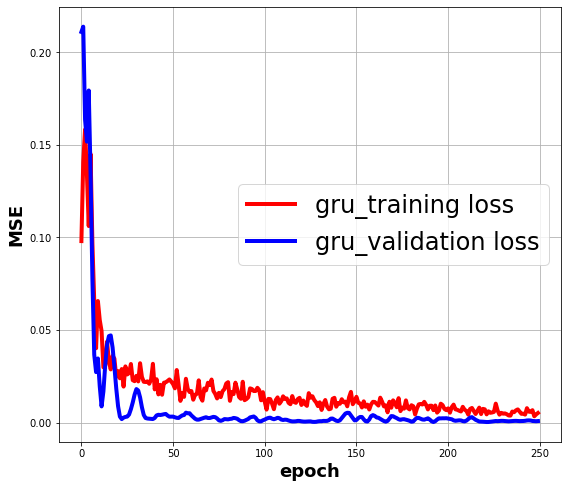

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(9,8))

plt.plot(hist_gru.history['loss'],'red',linewidth=4)
plt.plot(hist_gru.history['val_loss'],'blue',linewidth=4)
plt.ylabel('MSE',fontweight='bold', color = 'black', fontsize='18', horizontalalignment='center')
plt.xlabel('epoch',fontweight='bold', color = 'black', fontsize='18', horizontalalignment='center')
plt.legend(fontsize=16)

plt.legend(['gru_training loss', 'gru_validation loss'],fontsize='24',loc='center right')


matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=20) 
plt.grid()
plt.show()

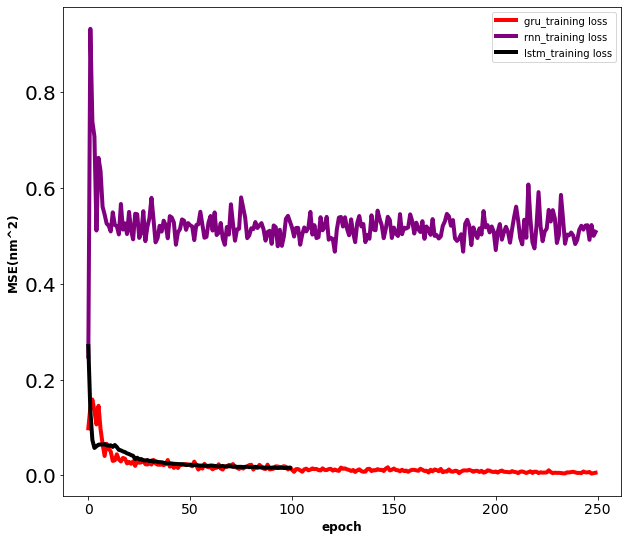

In [18]:
# # rnn lstm gru training and validation loss

# In[693]:


#training and validation loss
plt.figure(figsize=(10,9))

plt.plot(hist_gru.history['loss'],'red',linewidth=4)
#plt.plot(hist_gru.history['val_loss'],'blue',linewidth=4)

plt.plot(hist_rnn.history['loss'],'purple',linewidth=4)
#plt.plot(hist_rnn.history['val_loss'],'brown',linewidth=4)


plt.plot(hist_lstm.history['loss'],'black',linewidth=4)
#plt.plot(hist_lstm.history['val_loss'],'green',linewidth=4)

#plt.title("Loss of Training and Testing by using LSTM")
plt.ylabel('MSE(nm^2)',fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.xlabel('epoch',fontweight='bold', color = 'black', fontsize='12', horizontalalignment='center')
plt.legend(['gru_training loss', 'rnn_training loss',  'lstm_training loss'], loc='upper right')
plt.show()


In [19]:
# # Test data

# In[696]:


pred=pd.read_csv(r'./test2.csv')
pred.head()


# In[697]:


X_pred=pred.iloc[:,:-3]
Y_pred=pred.iloc[:,-3:]
X_pred.head()
print(X_pred)
print(Y_pred)


# In[698]:


x_pred, y_pred = X_pred.values, Y_pred.values  

# scaling values for model
x_pred_scale = MinMaxScaler()
y_pred_scale = MinMaxScaler() 

Xx__pred = x_pred_scale.fit_transform(x_pred)
Yy_pred = y_pred_scale.fit_transform(y_pred)  


# In[699]:


pred_x = np.reshape(Xx__pred, (Xx__pred.shape[0], 1, Xx__pred.shape[1])) 
pred_x


         P1        P2        P3        P4        P5        P6        P7  \
0  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009  0.000009   

         P8        P9       P10  ...     P1992     P1993     P1994     P1995  \
0  0.000009  0.000009  0.000009  ...  0.000007  0.000007  0.000007  0.000007   

      P1996     P1997     P1998     P1999     P2000     P2001  
0  0.000007  0.000007  0.000007  0.000007  0.000007  0.000007  

[1 rows x 2001 columns]
       FBG1     FBG2      FBG3
0  1545.277  1545.32  1545.642


array([[[0., 0., 0., ..., 0., 0., 0.]]])

In [20]:
# # prediction

# In[700]:


from timeit import default_timer as timer
start = timer()

#Getting the detected central wavelength of FBGs
pred_y=model_lstm.predict(pred_x)
duration = timer() - start
print('Compilation Time:',duration)
y_trans=y_scale.inverse_transform(pred_y)
y_trans
print ("the predictied value of four FBGs are:",y_trans)
allFBG=y_trans[0]
FBG1_LSTM=allFBG[0]
FBG2_LSTM=allFBG[1]
FBG3_LSTM=allFBG[2]


FBG1_LSTM,FBG2_LSTM,FBG3_LSTM



# In[701]:


# Actual Value
y_pred

allFBG_act=y_pred[0]
FBG1_act_LSTM=allFBG_act[0]
FBG2_act_LSTM=allFBG_act[1]
FBG3_act_LSTM=allFBG_act[2]

print("the actual value are:",FBG1_act_LSTM,FBG2_act_LSTM,FBG3_act_LSTM)


Compilation Time: 0.4498016000000007
the predictied value of four FBGs are: [[1545.1257 1545.4146 1545.7954]]
the actual value are: 1545.277 1545.32 1545.642


In [21]:
# # performance evaluation

# In[702]:


#Mean Square Error between the predicted and the actual value
from sklearn.metrics import mean_squared_error 
from sklearn import metrics
print('Mean squared error:',mean_squared_error(y_pred,y_trans))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_pred, y_trans))   
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_pred, y_trans)))


# # LSTM training and validation loss

# In[693]:






Mean squared error: 0.018452135489148935
Mean Absolute Error: 0.1330761718750182
Root Mean Squared Error: 0.13583863768879947


NameError: name 'FBG1_pred' is not defined

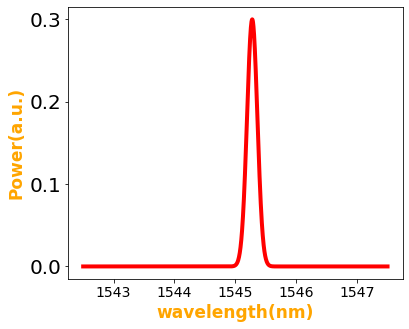

In [22]:
import numpy as np
import matplotlib.pyplot as plt
#np.linspace(1544.95,1549.95,1001);


x = np.linspace(1542.5,1547.5,2001);

FBG1_act=0.30*np.exp(-4*np.log(2)*((x-FBG1_act_LSTM)/(0.2))**2); #Actual central wavelength of FBg1
FBG2_act=0.27*np.exp(-4*np.log(2)*((x-FBG2_act_LSTM)/(0.2))**2);#Actual central wavelength of FBg2
FBG3_act=0.25*np.exp(-4*np.log(2)*((x-FBG3_act_LSTM)/(0.2))**2); #Actual central wavelength of FBg3
#FBG4_act=0.23*np.exp(-4*np.log(2)*((x-FBG4_act_LSTM)/(0.2))**2); #Actual central wavelength of FBg4
#FBG1_pred=0.30*np.exp(-4*np.log(2)*((x-FBG1_LSTM)/(0.2))**2); #FBG1 Pridcited central wavelength
#FBG3_pred=0.25*np.exp(-4*np.log(2)*((x-FBG3_LSTM)/(0.2))**2); #FBG1 Pridcited central wavelength
#FBG4_pred=0.23*np.exp(-4*np.log(2)*((x-FBG4_LSTM)/(0.2))**2); #Actual central wavelength of FBg4
plt.figure(figsize=(6,5))
plt.plot(x,FBG1_act,label='Actual value of FBG1',linewidth=4, color='r')
plt.ylabel('Power(a.u.)', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.xlabel('wavelength(nm)', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.plot(x,FBG1_pred,label='Predicted value of FBG1',linewidth=4, color='b')
#plt.legend(loc='best')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off

#plt.xticks.labelsize:'100'
#plt.yticks.labelsize:'100'     
plt.grid(linestyle='dotted',linewidth=1);
plt.show()

print(FBG1_act)

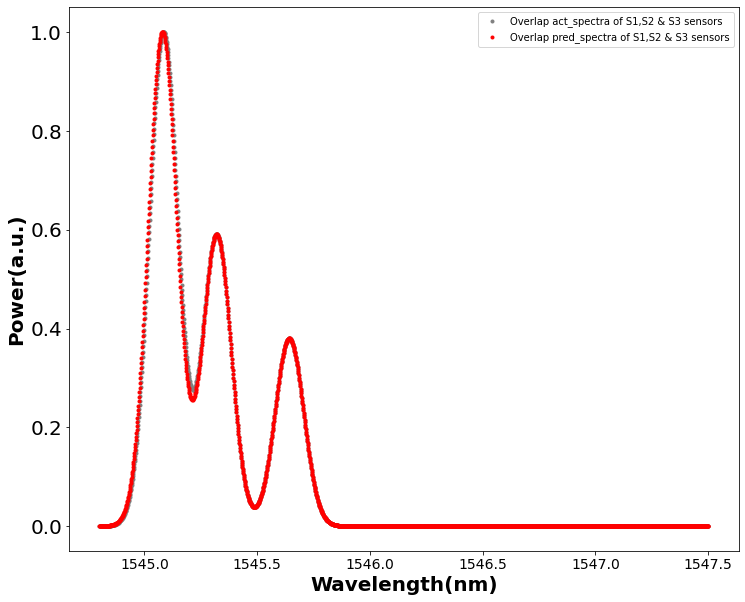

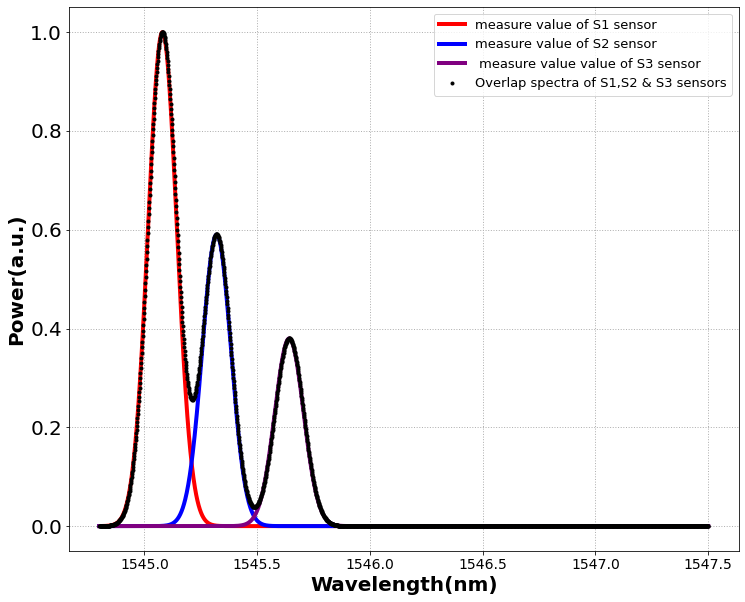

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#x = np.linspace(1544.95,1549.95,1001);
x = np.linspace(1544.8,1547.5,2001);

FBG1_act=1*np.exp(-4*np.log(2)*((x-1545.085)/(0.15))**2); #Actual central wavelength of FBg1
FBG2_act=0.59*np.exp(-4*np.log(2)*((x-1545.32)/(0.15))**2);#Actual central wavelength of FBg2
FBG3_act=0.38*np.exp(-4*np.log(2)*((x-1545.642)/(0.15))**2); #Actual central wavelength of FBg3
#FBG4_act=0.15*np.exp(-4*np.log(2)*((x-FBG4_act_LSTM)/(0.2))**2); #Actual central wavelength of FBg4
FBG1_pred=1*np.exp(-4*np.log(2)*((x-1545.0798)/(0.15))**2); #FBG1 Pridcited central wavelength
FBG2_pred=0.59*np.exp(-4*np.log(2)*((x-1545.32)/(0.15))**2);#Actual central wavelength of FBg2
FBG3_pred=0.38*np.exp(-4*np.log(2)*((x-1545.642)/(0.15))**2); #FBG1 Pridcited central wavelength
#FBG4_pred=0.15*np.exp(-4*np.log(2)*((x-FBG4_LSTM)/(0.2))**2); #Actual central wavelength of FBg4



overlap1=FBG1_act+FBG2_act+FBG3_act;#overlap spectra of FBG1 ,FBG2 and FBG3
overlap2=FBG1_pred+FBG2_pred+FBG3_pred;#overlap spectra of FBG1 ,FBG2 and FBG3
plt.figure(figsize=(12,10))
plt.plot(x,overlap1,'.',label='Overlap act_spectra of S1,S2 & S3 sensors',linewidth=8, color='gray')
plt.plot(x,overlap2,'.',label='Overlap pred_spectra of S1,S2 & S3 sensors',linewidth=8, color='red')
plt.ylabel('Power(a.u.)', fontweight='bold',color = 'black', fontsize='20', horizontalalignment='center')
plt.xlabel('Wavelength(nm)', fontweight='bold', color = 'black', fontsize='20', horizontalalignment='center')
plt.legend(loc='upper right')
plt.figure(figsize=(12,10))



#plt.plot(x,overlap2,'.',label='Overlap spectra of S1,S2 & S3 sensors',linewidth=8, color='black')
plt.plot(x,FBG1_pred,label='measure value of S1 sensor',linewidth=4, color='r')
plt.ylabel('Power(a.u.)', fontweight='bold',color = 'black', fontsize='20', horizontalalignment='center')
plt.xlabel('Wavelength(nm)', fontweight='bold', color = 'black', fontsize='20', horizontalalignment='center')
plt.plot(x,FBG2_pred,label='measure value of S2 sensor',linewidth=4, color='b')
plt.plot(x,FBG3_pred,label=' measure value value of S3 sensor',linewidth=4, color='purple')



plt.plot(x,overlap2,'.',label='Overlap spectra of S1,S2 & S3 sensors',linewidth=8, color='black')
#plt.plot(x,FBG1_pred,label='Measured value of S1 sensor',linewidth=4, color='r')
#plt.ylabel('Power(a.u.)', fontweight='bold',color = 'black', fontsize='20', horizontalalignment='center')
#plt.xlabel('Wavelength(nm)', fontweight='bold', color = 'black', fontsize='20', horizontalalignment='center')
#plt.plot(x,FBG2_pred,label='Measured value of S2 sensor',linewidth=4, color='b')
#plt.plot(x,FBG3_pred,label=' Measured value of S3 sensor',linewidth=4, color='purple')
#plt.plot(x,FBG4_act,label=' Measured value of S4 sensor',linewidth=4, color='green')

#plt.legend(loc='upper right')
plt.legend(loc='upper left')




plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off

#plt.xticks.labelsize:'100'
#plt.yticks.labelsize:'100' 
plt.grid(linestyle='dotted',linewidth=1);
plt.legend(fontsize=13)
#plt.xlabel.titlesize= 100
#plt.xlabel.labelsize= 100
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=20) 
plt.show()













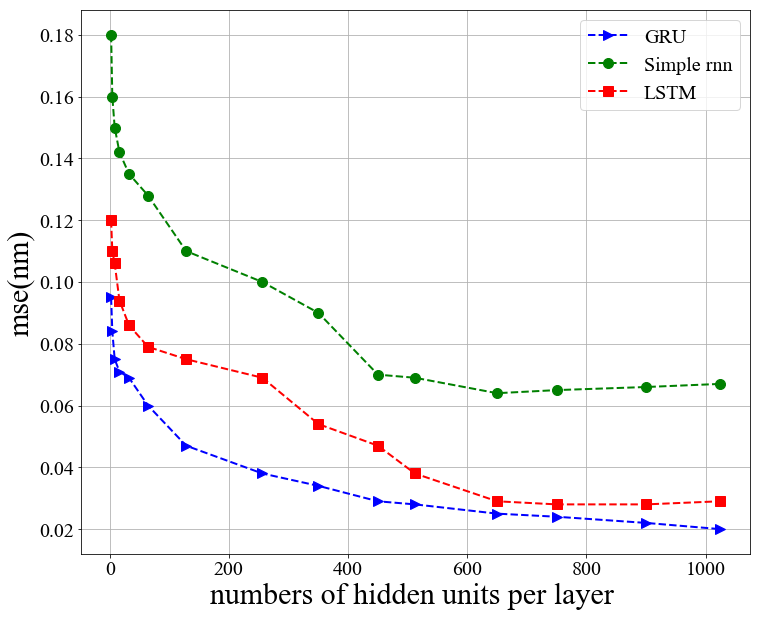

In [6]:

a=[2,4,8,16,32,64,128,256,350,450,512,650,750,900,1024]
b=[0.095,0.084,0.075,0.071,0.069,0.06,0.047,0.038,0.034,0.029,0.028,0.025,0.024,0.022,0.02]
c=[0.18,0.16,0.15,0.142,0.135,0.128,0.11,0.1,0.09,0.07,0.069,0.064,0.065,0.066,0.067]#RNN
d=[0.12,0.11,0.106,0.094,0.086,0.079,0.075,0.069,0.054,0.047,0.038,0.029,0.028,0.028,0.029]#LSTM



plt.figure(figsize=(12,10))
plt.plot(a,b,'>--',label='GRU',linewidth=2,markersize=10, color='blue')
plt.plot(a,c,'o--',label='Simple rnn',linewidth=2,markersize=10, color='green')
plt.plot(a,d,'s--',label='LSTM',linewidth=2,markersize=10, color='r')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.ylabel('mse(nm)', fontweight='bold',color = 'black', fontsize='30', horizontalalignment='center')
plt.xlabel('numbers of hidden units per layer ', fontweight='bold', color = 'black', fontsize='30', horizontalalignment='center')
plt.legend(loc='upper right',fontsize='20')
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(True)
plt.show()


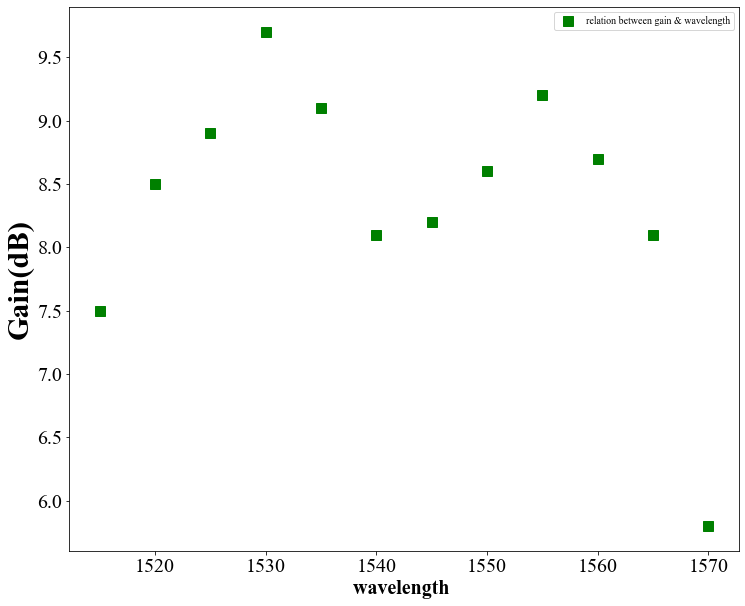

In [24]:
a=[1515,1520,1525,1530,1535,1540,1545,1550,1555,1560,1565,1570]
b=[7.5,8.5,8.9,9.7,9.1,8.1,8.2,8.6,9.2,8.7,8.1,5.8]
plt.figure(figsize=(12,10))
plt.plot(a,b,'bs',label='relation between gain & wavelength',linewidth=25,markersize=10, color='green')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.ylabel('Gain(dB)', fontweight='bold',color = 'black', fontsize='30', horizontalalignment='center')
plt.xlabel('wavelength ', fontweight='bold', color = 'black', fontsize='20', horizontalalignment='center')
plt.legend(loc='upper right',fontsize='10')

plt.show()

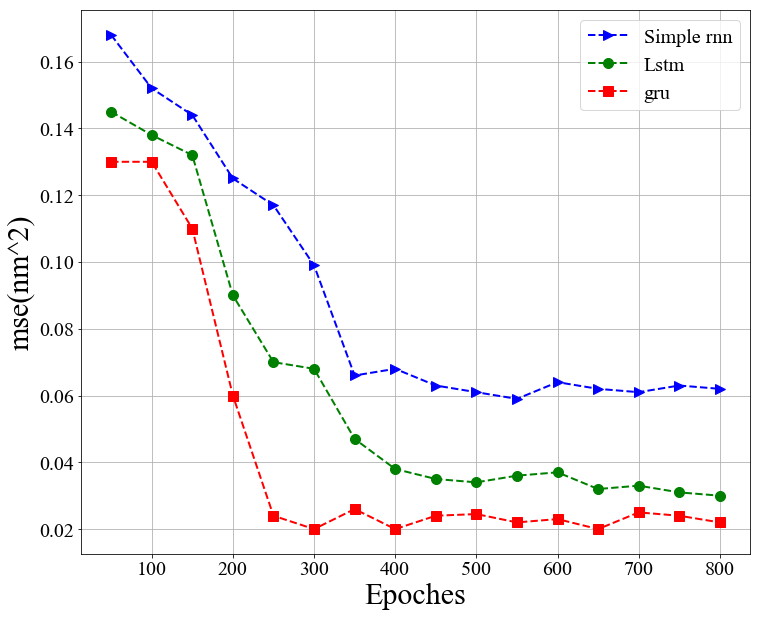

In [44]:
e=[50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
f=[0.168,0.152,0.144,0.125,0.117,0.099,0.066,0.068,0.063,0.061,0.059,0.064,0.062,0.061,0.063,0.062]
g=[0.145,0.138,0.132,0.09,0.07,0.068,0.047,0.038,0.035,0.034,0.036,0.037,0.032,0.033,0.031,0.03]
h=[0.13,0.13,0.11,0.06,0.024,0.02,0.026,0.02,0.024,0.0245,0.022,0.023,0.02,0.025,0.024,0.022]
plt.figure(figsize=(12,10))
plt.plot(e,f,'>--',label='Simple rnn',linewidth=2,markersize=10, color='blue')
plt.plot(e,g,'o--',label='Lstm',linewidth=2,markersize=10, color='green')
plt.plot(e,h,'s--',label='gru',linewidth=2,markersize=10, color='r')
plt.ylabel('mse(nm^2)', fontweight='bold',color = 'black', fontsize='30', horizontalalignment='center')
plt.xlabel('Epoches',  fontweight='bold', color = 'black', fontsize='30', horizontalalignment='center')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc='upper right',fontsize='20')
plt.grid(True)
plt.show()

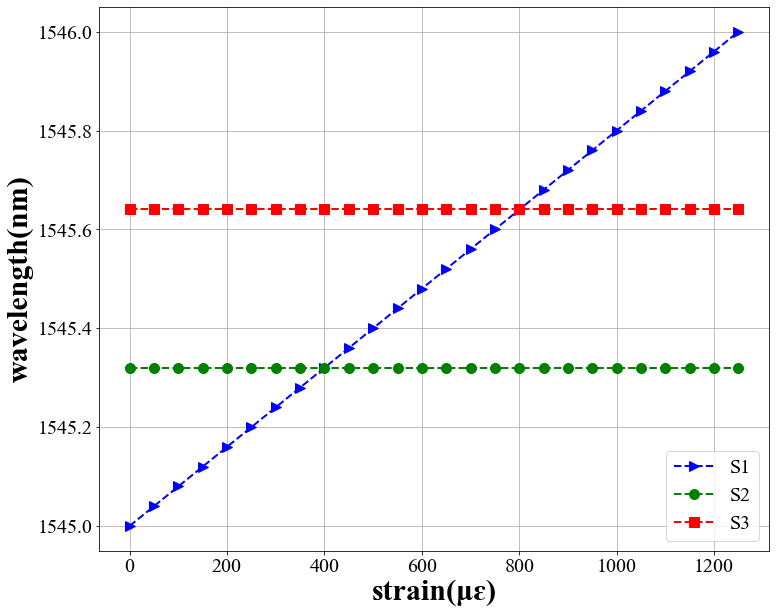

In [25]:

a=[0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200,1250]
b=[1545,1545.035,1545.075,1545.105,1545.135,1545.165,1545.195,1545.225,1545.255,1545.285,1545.315,1545.345,1545.375,1545.405,1545.435,1545.465,1545.495,1545.525,1545.555
,1545.585
,1545.615
,1545.645
,1545.675
,1545.705
,1545.735
,1545.765]
c=[1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
,1545.32
]
d=[1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
,1545.642
]
x = np.linspace(1545,1546,26);
plt.figure(figsize=(12,10))
plt.plot(a,x,'>--',label='S1',linewidth=2,markersize=10, color='blue')
plt.plot(a,c,'o--',label='S2',linewidth=2,markersize=10, color='green')
plt.plot(a,d,'s--',label='S3',linewidth=2,markersize=10, color='r')

plt.ylabel('wavelength(nm)', fontweight='bold',color = 'black', fontsize='30', horizontalalignment='center')
plt.xlabel('strain(μɛ)',  fontweight='bold', color = 'black', fontsize='30', horizontalalignment='center')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc= 'lower right',fontsize='20')
plt.grid(True)
plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, None, 512)         3861504   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
gru_2 (GRU)                  (None, 512)               1574400   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
_________________________________________________________________
dense_2 (Dense)      

Epoch 47/100
21/21 [==============================] - 0s 9ms/step - loss: 0.1129 - acc: 1.0000 - val_loss: 0.0275 - val_acc: 1.0000
Epoch 48/100
21/21 [==============================] - 0s 9ms/step - loss: 0.1126 - acc: 1.0000 - val_loss: 0.0273 - val_acc: 1.0000
Epoch 49/100
21/21 [==============================] - 0s 9ms/step - loss: 0.1123 - acc: 1.0000 - val_loss: 0.0272 - val_acc: 1.0000
Epoch 50/100
21/21 [==============================] - 0s 9ms/step - loss: 0.1119 - acc: 1.0000 - val_loss: 0.0270 - val_acc: 1.0000
Epoch 51/100
21/21 [==============================] - 0s 10ms/step - loss: 0.1116 - acc: 1.0000 - val_loss: 0.0268 - val_acc: 1.0000
Epoch 52/100
21/21 [==============================] - 0s 10ms/step - loss: 0.1113 - acc: 1.0000 - val_loss: 0.0266 - val_acc: 1.0000
Epoch 53/100
21/21 [==============================] - 0s 10ms/step - loss: 0.1110 - acc: 1.0000 - val_loss: 0.0264 - val_acc: 1.0000
Epoch 54/100
21/21 [==============================] - 0s 11ms/step - loss

Compilation Time: 0.1875516999999718
the predictied value of four FBGs are: [[1545.1077 1545.32   1545.642 ]]
the actual value are: 1545.277 1545.32 1545.642


Mean squared error: 0.009558000729247888
Mean Absolute Error: 0.05647330729167758
Root Mean Squared Error: 0.09776502815039685


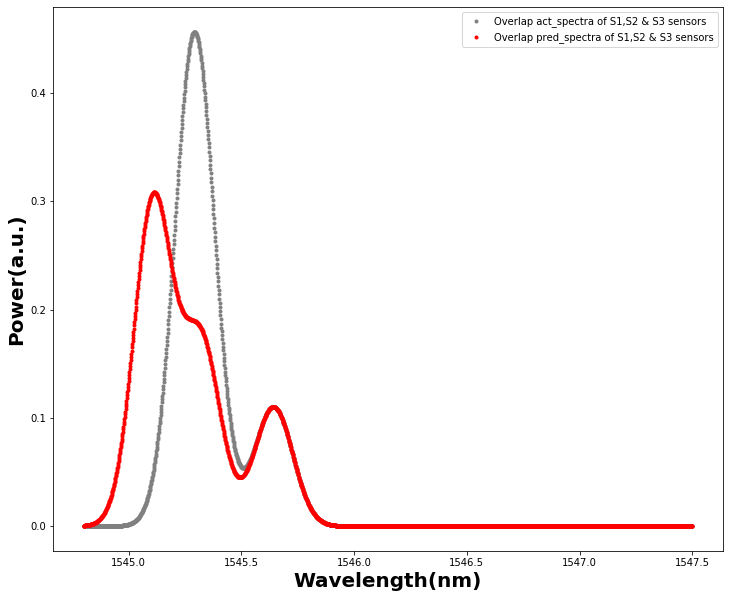

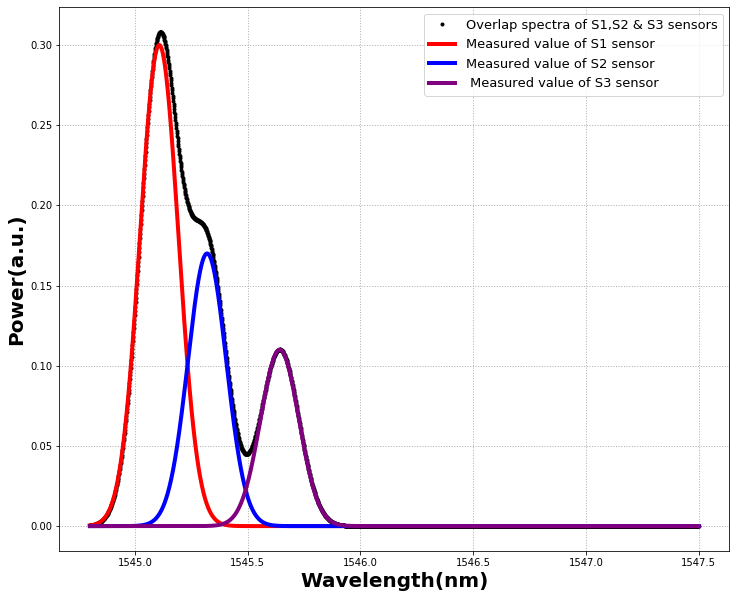

TypeError: SimpleRNN() got an unexpected keyword argument 'batch_input_shape'

In [4]:
pd.DataFrame(FBG1_act,)
pd.to_excel()

,0
0,4.499113e-05
1,4.945500e-05
2,5.433736e-05
3,5.967491e-05
4,6.550734e-05
5,7.187751e-05
6,7.883173e-05
7,8.641995e-05
8,9.469606e-05
9,1.037182e-04
